# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

To recommend an efficient method to improve SAT participation based on previous years' data

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [2]:
#Imports:
import numpy as np
import pandas as pd

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code:
raw_sat2017 = ''
raw_act2017 = ''

sat2017_file = '../data/sat_2017.csv'
act2017_file = '../data/act_2017.csv'

sat2017_df=pd.read_csv(sat2017_file)
act2017_df=pd.read_csv(act2017_file)



#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
print(sat2017_df[:10])
print(act2017_df[:10])

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**SAT**\
    State: State where SAT was taken.\
    Participation: Participation percentage based on eligible students.\
    Evidence-Based Reading and Writing: SAT score for Evidence-based Reading Writing assessment.\
    Math: SAT score for Math assessment.\
    Total: Total score of ERW and Math.\
\
**ACT**\
State: State where ACT was taken.\
Participation: Participation percentage based on eligible students.\
English: ACT score for English assessment.\
Math: ACT score for Math assessment.\
Reading: ACT score for Reading assessment.\
Science: ACT score for Science assessment.\
Composite: average score for all assessments taken.




#### 4a. Does the data look complete? 

Yes. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

SAT 2017 Maryland's Math score is too low. ACT 2017 Wyoming has a wrong composite score

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [ ]:
#code


#### 5. What are your data types? 
Display the data types of each feature. 

In [5]:
#code
print("SAT data types")
print("--------------")
print(sat2017_df.dtypes)
print("")
print("ACT data types")
print("--------------")
print(act2017_df.dtypes)

SAT data types
--------------
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

ACT data types
--------------
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Participation and Composite should be a numerical data type

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [6]:
#code
def convertParticipation(dataframe,colname):
    dataframe[colname]=dataframe[colname].apply(lambda x:float(x.replace('%','')))
    
def convertColFloat(dataframe,colname):
        try:
            dataframe[colname]=dataframe[colname].apply(lambda x:float(x))
        except ValueError:
            dataframe[colname]=dataframe[colname].apply(lambda x:float(x.replace('x','')))

convertParticipation(sat2017_df,'Participation')


- Fix any individual values preventing other columns from being the appropriate type.

In [7]:
#code
convertParticipation(act2017_df,'Participation')
convertColFloat(act2017_df,'Composite')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [8]:
#code
print("SAT data types")
print("--------------")
print(sat2017_df.dtypes)
print("")
print("ACT data types")
print("--------------")
print(act2017_df.dtypes)

SAT data types
--------------
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

ACT data types
--------------
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


- Display the data types again to confirm they are correct.

In [9]:
#Code:
print()
print("SAT data types")
print("--------------")
print(sat2017_df)
print("")
print("ACT data types")
print("--------------")
print(act2017_df)


SAT data types
--------------
                   State  Participation  Evidence-Based Reading and Writing  \
0                Alabama            5.0                                 593   
1                 Alaska           38.0                                 547   
2                Arizona           30.0                                 563   
3               Arkansas            3.0                                 614   
4             California           53.0                                 531   
5               Colorado           11.0                                 606   
6            Connecticut          100.0                                 530   
7               Delaware          100.0                                 503   
8   District of Columbia          100.0                                 482   
9                Florida           83.0                                 520   
10               Georgia           61.0                                 535   
11                Haw

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [10]:
#code

sat2017_df.rename(columns={'State':'state',
                   'Participation':'sat_participation',
                    'Evidence-Based Reading and Writing':'sat_evidence_read_write',
                    'Math':'sat_math',
                    'Total':'total'},inplace=True)
act2017_df.rename(columns={'State':'state',
                   'Participation':'act_participation',
                    'English':'act_english',
                    'Math':'act_math',
                    'Reading':'act_reading',
                    'Science':'act_science',
                    'Composite':'act_composite'},inplace=True)




In [93]:
sat2017_df

,state,sat_participation,sat_evidence_read_write,sat_math,total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0
5,Colorado,11.0,606.0,595.0,1201.0
6,Connecticut,100.0,530.0,512.0,1041.0
7,Delaware,100.0,503.0,492.0,996.0
8,District of Columbia,100.0,482.0,468.0,950.0
9,Florida,83.0,520.0,497.0,1017.0


In [94]:

act2017_df

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 



**SAT 2017**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT 2017|States participating in SAT| 
|sat_participation|float|SAT 2017|participation Percentage of SAT| 
|sat_evidence_read_write|int|SAT 2017|Score for SAT Evidence Read Write| 
|sat_math|int|SAT 2017|Score for SAT Math|
|total|int|SAT 2017|Total Score for Evidence Read Write and Math| 

**ACT 2017**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT 2017|States participating in SAT| 
|act_participation|float|ACT 2017|participation Percentage of SAT| 
|act_english|int|ACT 2017|Score for ACT English| 
|act_math|float|ACT 2017|Score for ACT Math|
|act_reading|float|ACT 2017|Score for ACT Reading|
|act_science|float|ACT 2017|Score for ACT Science|
|composite|float|ACT 2017|Composite Score for ACT| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [11]:
#code
act2017_df=act2017_df.drop([0],axis=0)
act2017_df

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8
6,Colorado,100.0,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2
10,Florida,73.0,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [12]:
#Code:
combined = pd.merge(sat2017_df, act2017_df, how='left',on='state')
combined['year']='2017'

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [13]:
#code
combined.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [14]:
import numpy as np
import pandas as pd

raw_sat2018 = ''
raw_act2018 = ''

sat2018_file = '../data/sat_2018.csv'
act2018_file = '../data/act_2018_updated.csv'

sat2018_df=pd.read_csv(sat2018_file)
act2018_df=pd.read_csv(act2018_file)

convertParticipation(sat2018_df,'Participation')
convertColFloat(act2018_df,'Percentage of Students Tested')

#sat2018_df.dtypes
#act2018_df.dtypes

sat2018_df.rename(columns={'State':'state',
                   'Participation':'sat_participation',
                    'Evidence-Based Reading and Writing':'sat_evidence_read_write',
                    'Math':'sat_math',
                    'Total':'total'},inplace=True)
act2018_df.rename(columns={'State':'state',
                   'Percentage of Students Tested':'act_participation',
                    'Average English Score':'act_english',
                    'Average Math Score':'act_math',
                    'Average Reading Score':'act_reading',
                    'Average Science Score':'act_science',
                    'Average Composite Score':'act_composite'},inplace=True)
sat2018_df.head()


,state,sat_participation,sat_evidence_read_write,sat_math,total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [127]:
act2018_df.head()

,state,act_participation,act_composite,act_english,act_math,act_reading,act_science
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [15]:
combined18 = pd.merge(sat2018_df, act2018_df, how='left',on='state')
combined18['year']='2018'
#print(combined18.head())
frames=[combined,combined18]
#final = pd.concat(frames, keys=['state'])
final=pd.concat([combined, combined18],keys='state')
final.to_csv('../data/final.csv')

/opt/anaconda3/envs/DSI/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [16]:
#Code:
final.describe()

,act_composite,act_english,act_math,act_participation,act_reading,act_science,sat_evidence_read_write,sat_math,sat_participation,total
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,21.502941,20.959804,21.153922,63.450980,22.014706,21.193137,566.401961,551.931373,42.774510,1123.058824
std,2.053756,2.388722,1.999291,33.010538,2.107337,2.601647,46.442823,68.684854,36.252663,92.915678
min,17.700000,16.300000,17.800000,7.000000,18.000000,2.300000,480.000000,52.000000,2.000000,950.000000
25%,19.825000,19.025000,19.400000,31.000000,20.425000,19.900000,534.250000,522.250000,4.000000,1055.250000
50%,21.350000,20.500000,20.900000,66.500000,21.650000,21.200000,554.500000,545.500000,45.500000,1099.000000
75%,23.600000,23.375000,23.100000,100.000000,24.175000,23.075000,613.500000,595.000000,70.000000,1209.500000
max,25.600000,26.000000,25.300000,100.000000,26.100000,24.900000,644.000000,655.000000,100.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [17]:
#code
from decimal import Decimal
'''[2,4,6,8]

The mean is 5.
The differences from each observation to the mean are [-3, -1, 1, 3].
The squared results are [9, 1, 1, 9].
The summed results equal 20.
Dividing 20 by (n-1) yields 20/3. (This is the variance, which is approximately 6.7.)
Taking the square root of 20/3 yields the standard deviation, which is approximately 2.6.'''

def std_dev(col):
    mean=0
    total=0
    diff=[]
    mean=np.mean(col)
    for v in col:
        diff.append(v-mean)
        sq=np.square(diff)
    total=sum(sq)
    dev=np.sqrt(total/len(col)-1)
    
    return dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
  
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [18]:
#Code:
sd={k:std_dev(final[k]) for k in final.keys() if k!='state' and k!='year'}
print(sd)
print(np.std(final))

{'act_composite': 1.7822906544477946, 'act_english': 2.1563976771331874, 'act_math': 1.7198763959592942, 'act_participation': 32.83309767537019, 'act_reading': 1.843185491650817, 'act_science': 2.3879296063097213, 'sat_evidence_read_write': 46.20378131625193, 'sat_math': 68.34001781804722, 'sat_participation': 36.060653388408305, 'total': 92.45367929023806}
act_composite               2.043663
act_english                 2.376984
act_math                    1.989466
act_participation          32.848323
act_reading                 2.096982
act_science                 2.588862
sat_evidence_read_write    46.214602
sat_math                   68.347334
sat_participation          36.074516
total                      92.459087
dtype: float64


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

All the standard deviations differ slightly however my personal function is closer to numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [19]:
##### Highest Participation ###########
print('Highest Participation')
print('SAT 2017: ',final[(final['year']=='2017')].sort_values(by='sat_participation',ascending=False).head(1)['state'])
print('SAT 2018: ',final[(final['year']=='2018')].sort_values(by='sat_participation',ascending=False).head(1)['state'])
print('ACT 2017: ',final[(final['year']=='2017')].sort_values(by='act_participation',ascending=False).head(1)['state'])
print('ACT 2018: ',final[(final['year']=='2018')].sort_values(by='act_participation',ascending=False).head(1)['state'])
##### Lowest Participation ###########
print('Lowest Participation')
print('SAT 2017: ',final[(final['year']=='2017')].sort_values(by='sat_participation',ascending=True).head(1)['state'])
print('SAT 2018: ',final[(final['year']=='2018')].sort_values(by='sat_participation',ascending=True).head(1)['state'])
print('ACT 2017: ',final[(final['year']=='2017')].sort_values(by='act_participation',ascending=True).head(1)['state'])
print('ACT 2018: ',final[(final['year']=='2018')].sort_values(by='act_participation',ascending=True).head(1)['state'])

##### Highest Total ###########
print('Total')
print('2017: ',final[(final['year']=='2017')].sort_values(by='total',ascending=False).head(1)['state'])
print('2018: ',final[(final['year']=='2018')].sort_values(by='total',ascending=False).head(1)['state'])

##### Highest Composite ###########
print('Composite')
print('2017: ',final[(final['year']=='2017')].sort_values(by='act_composite',ascending=False).head(1)['state'])
print('2018: ',final[(final['year']=='2018')].sort_values(by='act_composite',ascending=False).head(1)['state'])




Highest Participation
SAT 2017:  s  8    District of Columbia
Name: state, dtype: object
SAT 2018:  t  5    Colorado
Name: state, dtype: object
ACT 2017:  s  0    Alabama
Name: state, dtype: object
ACT 2018:  t  0    Alabama
Name: state, dtype: object
Lowest Participation
SAT 2017:  s  34    North Dakota
Name: state, dtype: object
SAT 2018:  t  34    North Dakota
Name: state, dtype: object
ACT 2017:  s  19    Maine
Name: state, dtype: object
ACT 2018:  t  19    Maine
Name: state, dtype: object
Total
2017:  s  23    Minnesota
Name: state, dtype: object
2018:  t  23    Minnesota
Name: state, dtype: object
Composite
2017:  s  29    New Hampshire
Name: state, dtype: object
2018:  t  6    Connecticut
Name: state, dtype: object


In [20]:
#print(stocks[(stocks['date'] == '1998-01-02') & (stocks['ticker'] == 'AAPL')]['close'])
sat_full_participation=final[(final['year']=='2018') & (final['sat_participation']==100)]['state']
sat_not_full=final[(final['year']=='2017') & (final['sat_participation']!=100)]['state']

sat_rate_change=[]
for s in sat_full_participation:
    for nf in sat_not_full:  
        if s == nf: 
            print(s)
            sat_rate_change.append(s)
        
sat_rate_change

Colorado
Idaho


['Colorado', 'Idaho']

In [21]:
print(final[(final['sat_participation']>50) & (final['act_participation']>50) & (final['year']=='2017')]['state'])
print(final[(final['sat_participation']>50) & (final['act_participation']>50) & (final['year']=='2018')]['state'])

s  9     Florida
   10    Georgia
   11     Hawaii
Name: state, dtype: object
t  9            Florida
   10           Georgia
   11            Hawaii
   33    North Carolina
   40    South Carolina
Name: state, dtype: object


Colorado is the state that increased to full participation.
Minnesota has the highest SAT score for 2 years.
Florida, Georgia and Hawaii has high participation rate for both assessments for both years.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))

# Generate 10 variables of 200 random observations.

corr = final.corr()
print(corr.shape)
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
#with sns.axes_style("white"):
#    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
sns.heatmap(corr,mask=mask)

(10, 10)


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [23]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [24]:
a=final['state']
print()

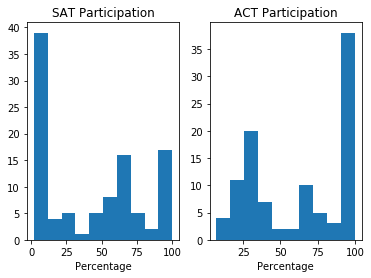

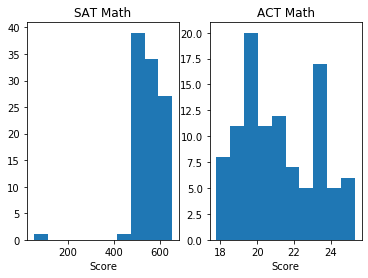

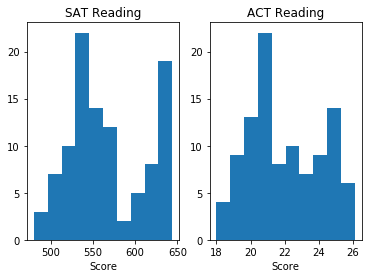

In [25]:
subplot_histograms(final,['sat_participation','act_participation'],['SAT Participation','ACT Participation'],['Percentage','Percentage'])
subplot_histograms(final,['sat_math','act_math'],['SAT Math','ACT Math'],['Score','Score'])
subplot_histograms(final,['sat_evidence_read_write','act_reading'],['SAT Reading','ACT Reading'],['Score','Score'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [26]:
# Code
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
def plot_scatter(p,dfx,dfy,t,xlabel,ylabel):
    p.scatter(dfx,dfy);
    p.title(t)
    p.xlabel(xlabel, fontsize = 20)
    p.ylabel(ylabel, fontsize = 20)

    

<Figure size 1152x648 with 0 Axes>

In [252]:
final.head()

act_composite  act_english  act_math  act_participation  act_reading  \
s 0           19.2         18.9      18.4              100.0         19.7   
  1           19.8         18.7      19.8               65.0         20.4   
  2           19.7         18.6      19.8               62.0         20.1   
  3           19.4         18.9      19.0              100.0         19.7   
  4           22.8         22.5      22.7               31.0         23.1   

     act_science  sat_evidence_read_write  sat_math  sat_participation  \
s 0         19.4                      593       572                5.0   
  1         19.9                      547       533               38.0   
  2         19.8                      563       553               30.0   
  3         19.5                      614       594                3.0   
  4         22.2                      531       524               53.0   

          state  total  year  
s 0     Alabama   1165  2017  
  1      Alaska   1080  2017  
  2     Arizona   1116  2017  
  3    Arkansas   1208  2017  
  4  California   1055  2017

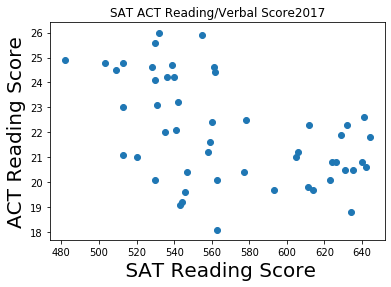

In [28]:
sat_read_score2017=final[final['year']=='2017']['sat_evidence_read_write']
act_read_score2017=final[final['year']=='2017']['act_reading']

plot_scatter(plt,sat_read_score2017,act_read_score2017,'SAT ACT Reading/Verbal Score2017',' SAT Reading Score','ACT Reading Score')

There is little correlation between ACT language score and SAT language score

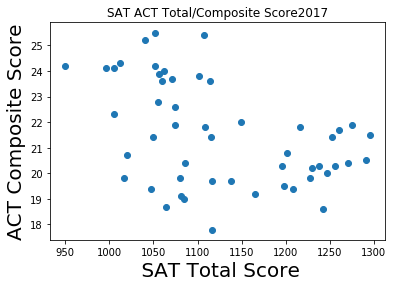

In [266]:
total_score2017=final[final['year']=='2017']['total']
composite_score2017=final[final['year']=='2017']['act_composite']

plot_scatter(plt,total_score2017,composite_score2017,'SAT ACT Total/Composite Score2017',' SAT Total Score','ACT Composite Score')

ACT composite does not correlate strong to SAT Total score.

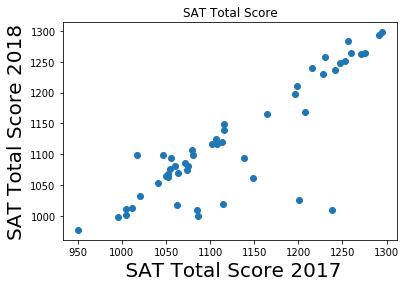

In [267]:
total_score2017=final[final['year']=='2017']['total']
total_score2018=final[final['year']=='2018']['total']
#composite_score2017=final[final['year']=='2017']['act_composite']

plot_scatter(plt,total_score2017,total_score2018,'SAT Total Score',' SAT Total Score 2017','SAT Total Score 2018')

There is strong positive correlation between SAT score 2017 and 2018. Performance of both years are the same.

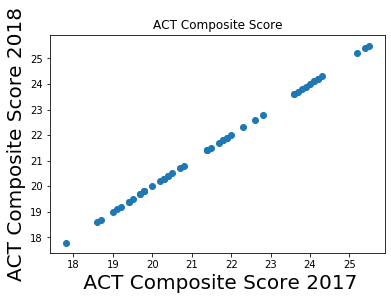

In [268]:
composite_score2017=final[final['year']=='2017']['act_composite']
composite_score2018=final[final['year']=='2018']['act_composite']

plot_scatter(plt,composite_score2017,composite_score2017,'ACT Composite Score',' ACT Composite Score 2017','ACT Composite Score 2018')

 There is strong positive correlation between ACT composite score 2017 and 2018. Performance of both years are the nearly the same.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [475]:
act_participation=final.loc[:,['act_participation','state','year']]
act_participation.head()                                                

act_participation       state  year
s 0              100.0     Alabama  2017
  1               65.0      Alaska  2017
  2               62.0     Arizona  2017
  3              100.0    Arkansas  2017
  4               31.0  California  2017

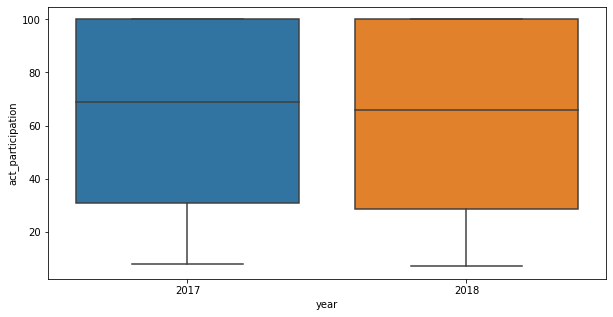

In [539]:
plt.figure(figsize=(10, 5))
ax_part = sns.boxplot(y='act_participation',x='year',data=act_participation, orient='v')  # RUN PLOT 
#ax_composite = sns.boxplot(data=subj, orient='v')  # RUN PLOT 

plt.show()

ACT participation over the 2 years have roughly remained the same.

In [477]:
sat_participation=final.loc[:,['sat_participation','state','year']]
sat_participation.head()                                                

sat_participation       state  year
s 0                5.0     Alabama  2017
  1               38.0      Alaska  2017
  2               30.0     Arizona  2017
  3                3.0    Arkansas  2017
  4               53.0  California  2017

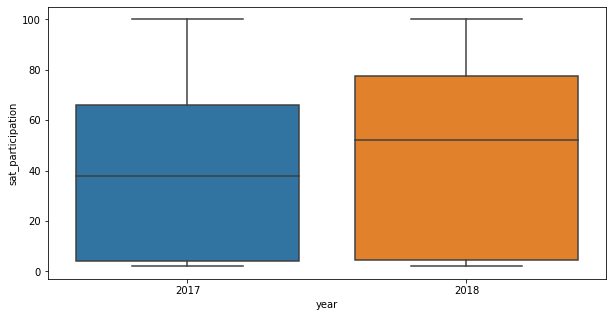

In [478]:
plt.figure(figsize=(10, 5))
ax_part = sns.boxplot(y='sat_participation',x='year',data=sat_participation, orient='v')  # RUN PLOT 
#ax_composite = sns.boxplot(data=subj, orient='v')  # RUN PLOT 

plt.show()

SAT participation have improved in 2018 over 2017 with a higher median and 75 percentile.

In [554]:
act_composite=final.loc[:,['act_composite','state','year']]
subj={}
d=[]
#act_results=final.loc[final['year']=='2017',['act_english', 'act_math','act_reading', 'act_science','year']]


act_english=final.loc[final['year']=='2017',['act_english']].values.tolist()
act_math=final.loc[final['year']=='2017',['act_math']].values.tolist()
act_reading=final.loc[final['year']=='2017',['act_reading']].values.tolist()
act_science=final.loc[final['year']=='2017',['act_science']].values.tolist()

subj['Subject']=[]
subj['Score']=[]
for i in range(len(act_english)):
    subj['Subject'].append('ACT English')
    subj['Score'].append(act_english[i][0])
    
for i in range(len(act_math)):
    subj['Subject'].append('ACT Math')
    subj['Score'].append(act_math[i][0])

for i in range(len(act_reading)):
    subj['Subject'].append('ACT Reading')
    subj['Score'].append(act_reading[i][0])

for i in range(len(act_science)):
    subj['Subject'].append('ACT Science')
    subj['Score'].append(act_science[i][0])
df_subj=pd.DataFrame(subj)


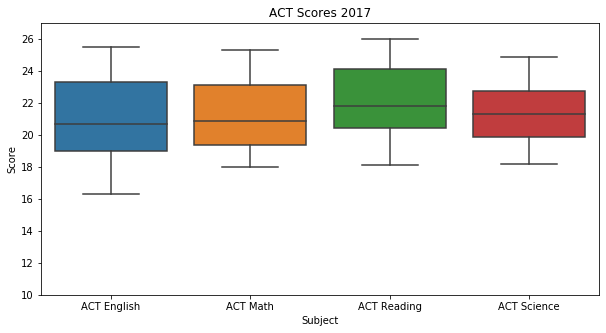

In [557]:
plt.figure(figsize=(10, 5))
ax_act2017 = sns.boxplot(x='Subject',y='Score',data=df_subj, orient='v')  # RUN PLOT 
#ax_composite = sns.boxplot(data=subj, orient='v')  # RUN PLOT 
ax_act2017.set_title('ACT Scores 2017')
ax_act2017.set_ylim([10, 27])
plt.show()


In [558]:
subj={}
d=[]
#act_results=final.loc[final['year']=='2017',['act_english', 'act_math','act_reading', 'act_science','year']]


act_english=final.loc[final['year']=='2018',['act_english']].values.tolist()
act_math=final.loc[final['year']=='2018',['act_math']].values.tolist()
#act_participation=final.loc[:,['act_participation','state']].values.tolist()
act_reading=final.loc[final['year']=='2018',['act_reading']].values.tolist()
act_science=final.loc[final['year']=='2018',['act_science']].values.tolist()

subj['Subject']=[]
subj['Score']=[]
for i in range(len(act_english)):
    subj['Subject'].append('ACT English')
    subj['Score'].append(act_english[i][0])
    
for i in range(len(act_math)):
    subj['Subject'].append('ACT Math')
    subj['Score'].append(act_math[i][0])

for i in range(len(act_reading)):
    subj['Subject'].append('ACT Reading')
    subj['Score'].append(act_reading[i][0])

for i in range(len(act_science)):
    subj['Subject'].append('ACT Science')
    subj['Score'].append(act_science[i][0])
df_subj=pd.DataFrame(subj)


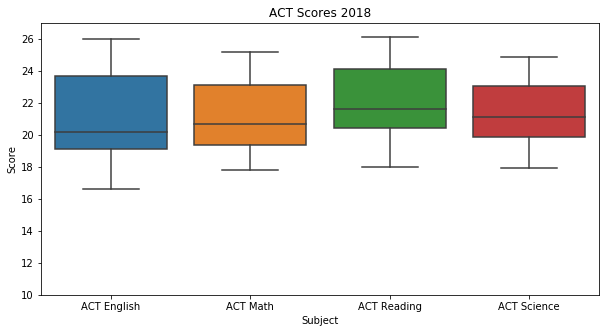

In [559]:
plt.figure(figsize=(10, 5))
ax_act2018 = sns.boxplot(x='Subject',y='Score',data=df_subj, orient='v')  # RUN PLOT 
#ax_composite = sns.boxplot(data=subj, orient='v')  # RUN PLOT 
ax_act2018.set_title('ACT Scores 2018')
ax_act2018.set_ylim([10, 27])
plt.show()

ACT results have remained the same for 2 years. 

In [561]:
subj={}
d=[]
#act_results=final.loc[final['year']=='2017',['act_english', 'act_math','act_reading', 'act_science','year']]


sat_english=final.loc[final['year']=='2017',['sat_evidence_read_write']].values.tolist()
sat_math=final.loc[final['year']=='2017',['sat_math']].values.tolist()
#act_participation=final.loc[:,['act_participation','state']].values.tolist()
sat_total=final.loc[final['year']=='2017',['total']].values.tolist()

subj['Subject']=[]
subj['Score']=[]
for i in range(len(sat_english)):
    subj['Subject'].append('SAT Reading Writing')
    subj['Score'].append(sat_english[i][0])
    
for i in range(len(sat_math)):
    subj['Subject'].append('SAT Math')
    subj['Score'].append(sat_math[i][0])

df_subj=pd.DataFrame(subj)


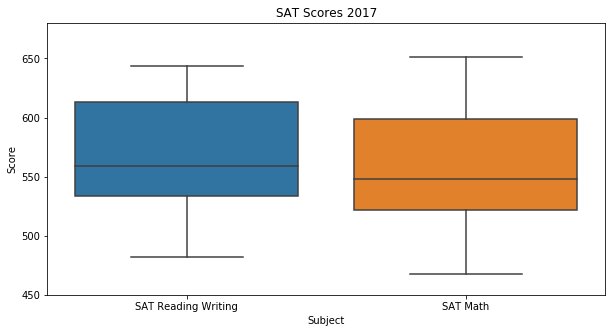

In [565]:
plt.figure(figsize=(10, 5))
ax_sat2017 = sns.boxplot(x='Subject',y='Score',data=df_subj, orient='v')  # RUN PLOT 
#ax_composite = sns.boxplot(data=subj, orient='v')  # RUN PLOT 
ax_sat2017.set_title('SAT Scores 2017')
ax_sat2017.set_ylim([450, 680])
plt.show()

In [549]:
subj={}
d=[]
#act_results=final.loc[final['year']=='2017',['act_english', 'act_math','act_reading', 'act_science','year']]


sat_english=final.loc[final['year']=='2018',['sat_evidence_read_write']].values.tolist()
sat_math=final.loc[final['year']=='2018',['sat_math']].values.tolist()
#act_participation=final.loc[:,['act_participation','state']].values.tolist()
sat_total=final.loc[final['year']=='2018',['total']].values.tolist()

subj['Subject']=[]
subj['Score']=[]
for i in range(len(sat_english)):
    subj['Subject'].append('SAT Reading Writing')
    subj['Score'].append(sat_english[i][0])
    
for i in range(len(sat_math)):
    subj['Subject'].append('SAT Math')
    subj['Score'].append(sat_math[i][0])

df_subj=pd.DataFrame(subj)


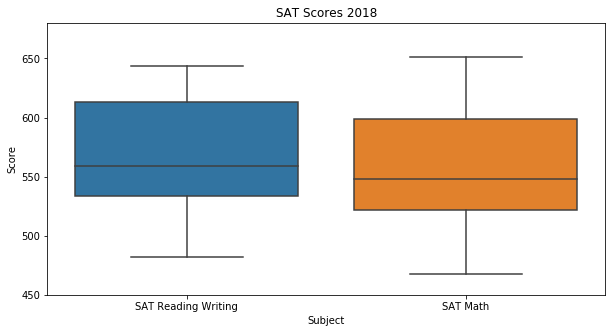

In [566]:
plt.figure(figsize=(10, 5))
ax_sam2018 = sns.boxplot(x='Subject',y='Score',data=df_subj, orient='v')  # RUN PLOT 
#ax_composite = sns.boxplot(data=subj, orient='v')  # RUN PLOT 
ax_sam2018.set_title('SAT Scores 2018')
ax_sam2018.set_ylim([450, 680])
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [31]:
final['total'].mean()

1123.0588235294117

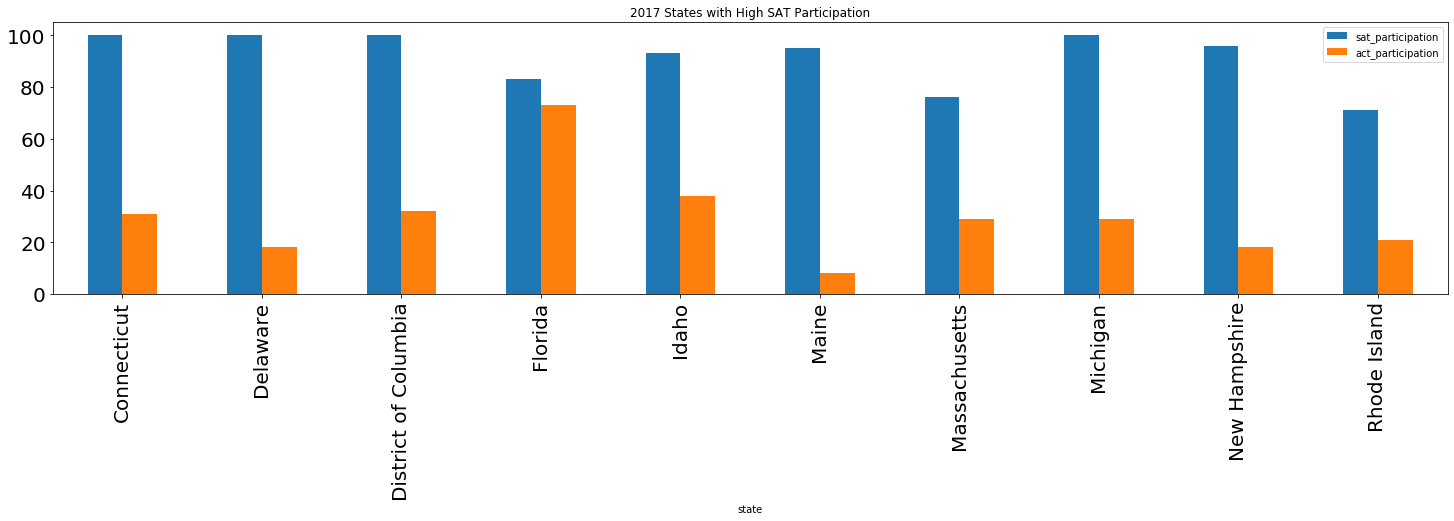

In [40]:
participation2017=final.loc[(final['year']=='2017') & (final['sat_participation']>70),['act_participation','sat_participation','state']]
participation2017.set_index('state',inplace=True)

participation2018=final.loc[(final['year']=='2018')& (final['sat_participation']>70),['act_participation','sat_participation','state']]
participation2018.set_index('state',inplace=True)


participation2017[['sat_participation','act_participation']].plot(kind='bar',figsize=(25,5),fontsize=20,title="2017 States with High SAT Participation")

#state_participation

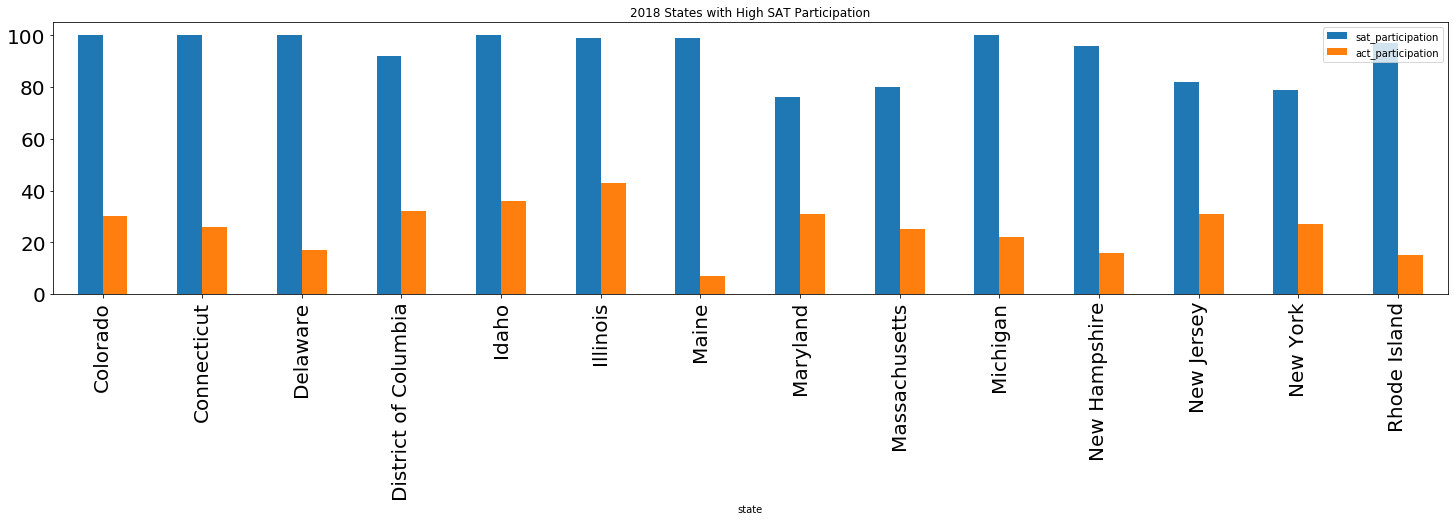

In [41]:
participation2018[['sat_participation','act_participation']].plot(kind='bar',figsize=(25,5),fontsize=20,title="2018 States with High SAT Participation")


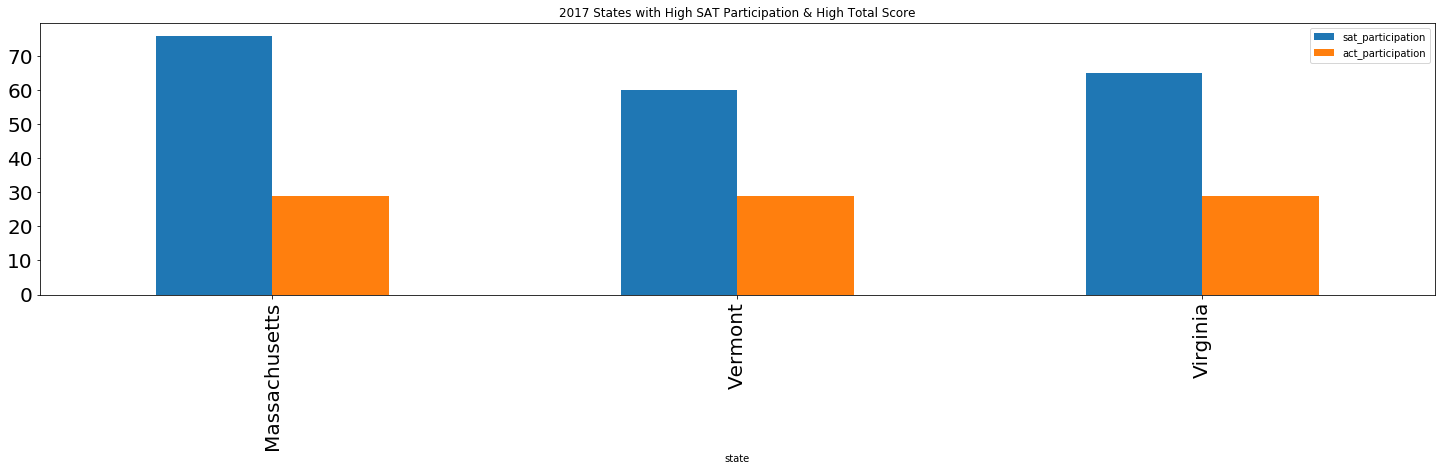

In [32]:

participation2017=final.loc[(final['year']=='2017') & (final['sat_participation']>50)&(final['total']>1100),['act_participation','sat_participation','state']]
participation2017.set_index('state',inplace=True)

participation2018=final.loc[(final['year']=='2018')& (final['sat_participation']>50)&(final['total']>1100),['act_participation','sat_participation','state']]
participation2018.set_index('state',inplace=True)


participation2017[['sat_participation','act_participation']].plot(kind='bar',figsize=(25,5),fontsize=20,title="2017 States with High SAT Participation & High Total Score")

#state_participation

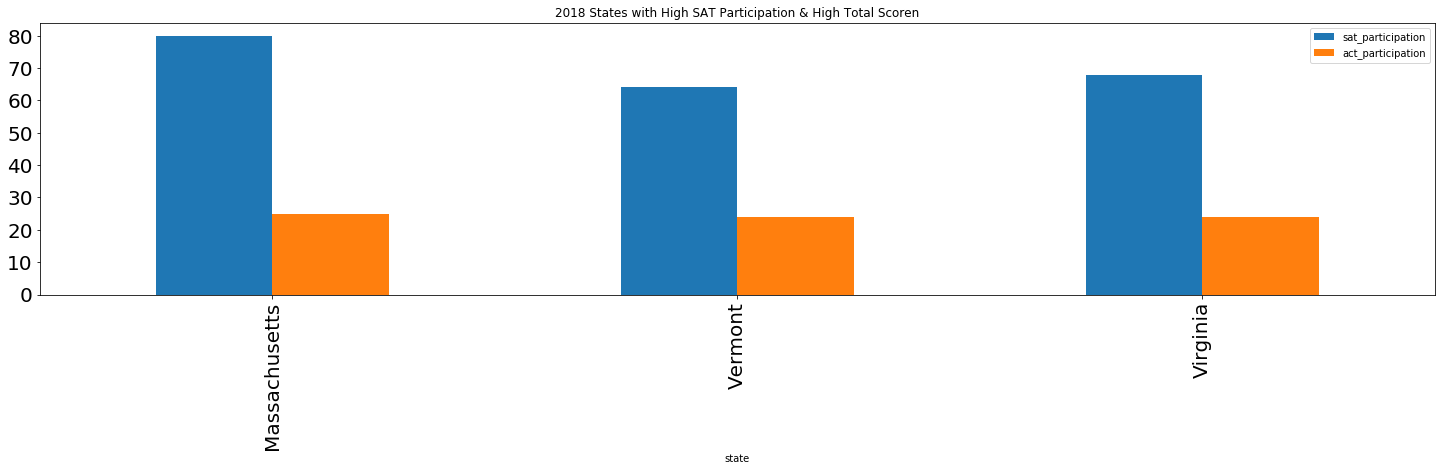

In [33]:
participation2018[['sat_participation','act_participation']].plot(kind='bar',figsize=(25,5),fontsize=20,title="2018 States with High SAT Participation & High Total Scoren")

In [40]:
final['act_composite'].mean()

21.50294117647059

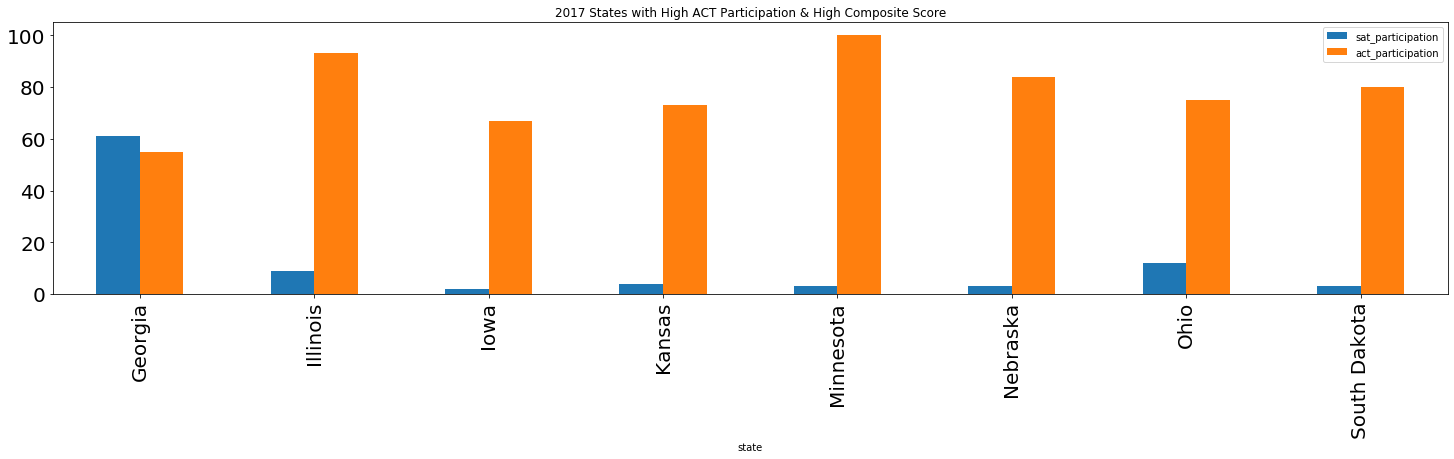

In [34]:
aparticipation2017=final.loc[(final['year']=='2017') & (final['act_participation']>50)&(final['act_composite']>21),['act_participation','sat_participation','state']]
aparticipation2017.set_index('state',inplace=True)

aparticipation2018=final.loc[(final['year']=='2018')& (final['act_participation']>50)&(final['act_composite']>21),['act_participation','sat_participation','state']]
aparticipation2018.set_index('state',inplace=True)
aparticipation2017[['sat_participation','act_participation']].plot(kind='bar',figsize=(25,5),fontsize=20,title="2017 States with High ACT Participation & High Composite Score")

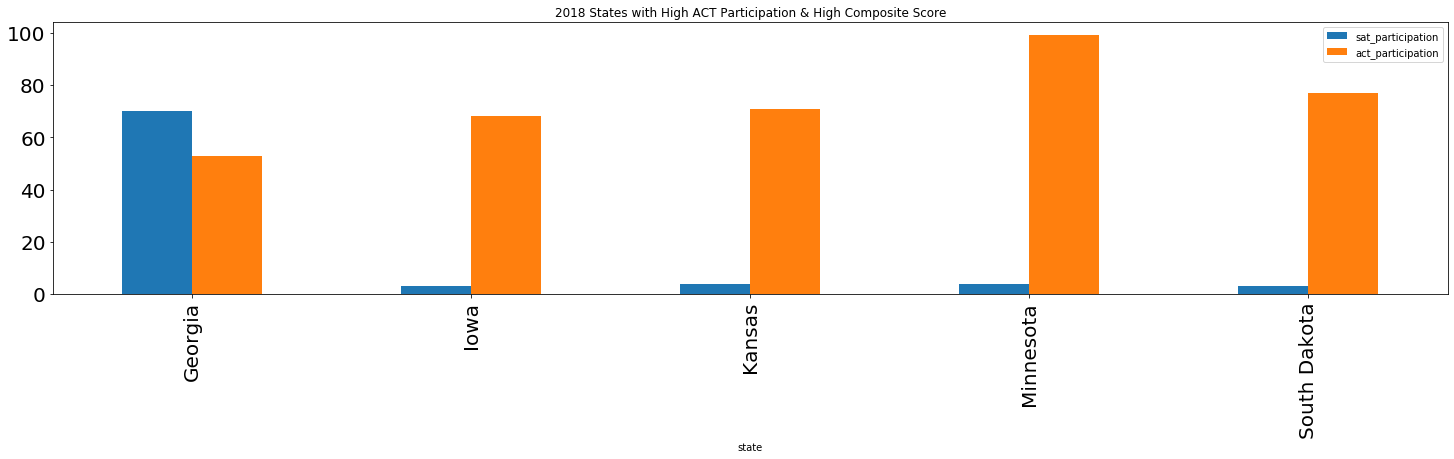

In [35]:
aparticipation2018[['sat_participation','act_participation']].plot(kind='bar',figsize=(25,5),fontsize=20,title="2018 States with High ACT Participation & High Composite Score")

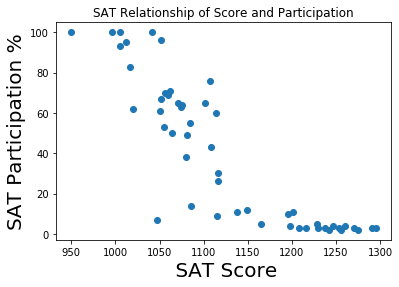

In [573]:
total_score2017=final[final['year']=='2017']['total']
sat_partrate2017=final[final['year']=='2017']['sat_participation']
#composite_score2017=final[final['year']=='2017']['act_composite']

plot_scatter(plt,total_score2017,sat_partrate2017,'SAT Relationship of Score and Participation 2018',' SAT Score','SAT Participation %')

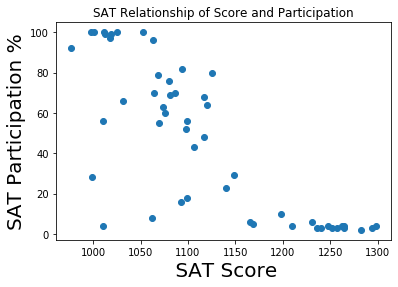

In [574]:
total_score2018=final[final['year']=='2018']['total']
sat_partrate2018=final[final['year']=='2018']['sat_participation']
#composite_score2017=final[final['year']=='2017']['act_composite']

plot_scatter(plt,total_score2018,sat_partrate2018,'SAT Relationship of Score and Participation 2018',' SAT Score','SAT Participation %')

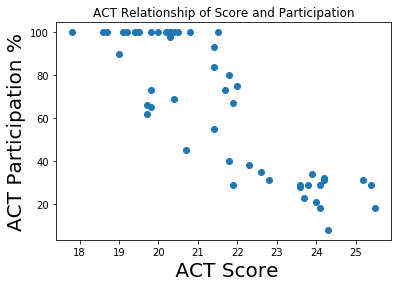

In [575]:
comp_score2017=final[final['year']=='2017']['act_composite']
act_partrate2017=final[final['year']=='2017']['act_participation']
#composite_score2017=final[final['year']=='2017']['act_composite']

plot_scatter(plt,comp_score2017,act_partrate2017,'ACT Relationship of Score and Participation 2017',' ACT Score','ACT Participation %')

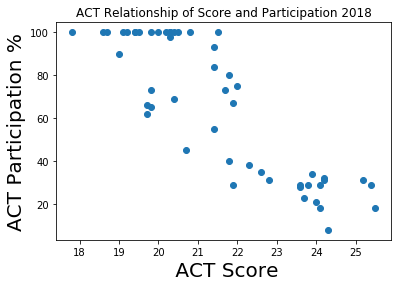

In [576]:
comp_score2018=final[final['year']=='2018']['act_composite']
act_partrate2018=final[final['year']=='2018']['act_participation']
#composite_score2017=final[final['year']=='2017']['act_composite']

plot_scatter(plt,comp_score2017,act_partrate2017,'ACT Relationship of Score and Participation 2018',' ACT Score','ACT Participation %')

For both SAT and ACT scores are higher when participation is low.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [569]:
final.describe()

,act_composite,act_english,act_math,act_participation,act_reading,act_science,sat_evidence_read_write,sat_math,sat_participation,total
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,21.502941,20.959804,21.153922,63.450980,22.014706,21.193137,566.401961,551.931373,42.774510,1123.058824
std,2.053756,2.388722,1.999291,33.010538,2.107337,2.601647,46.442823,68.684854,36.252663,92.915678
min,17.700000,16.300000,17.800000,7.000000,18.000000,2.300000,480.000000,52.000000,2.000000,950.000000
25%,19.825000,19.025000,19.400000,31.000000,20.425000,19.900000,534.250000,522.250000,4.000000,1055.250000
50%,21.350000,20.500000,20.900000,66.500000,21.650000,21.200000,554.500000,545.500000,45.500000,1099.000000
75%,23.600000,23.375000,23.100000,100.000000,24.175000,23.075000,613.500000,595.000000,70.000000,1209.500000
max,25.600000,26.000000,25.300000,100.000000,26.100000,24.900000,644.000000,655.000000,100.000000,1298.000000


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

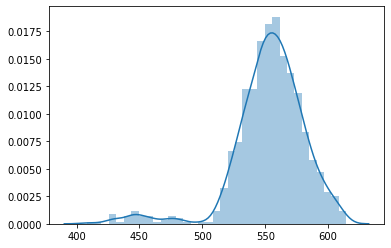

In [532]:
sat_math=[sum(np.random.choice(final['sat_math'], size=5,replace=False))/5 for _ in range(1000)]
sns.distplot(sat_math)

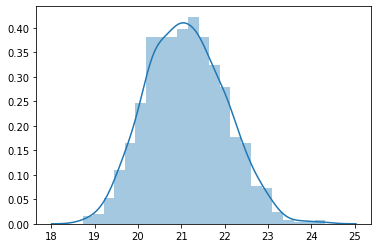

In [533]:
act_math=[sum(np.random.choice(final['act_math'], size=5,replace=False))/5 for _ in range(1000)]
sns.distplot(act_math)

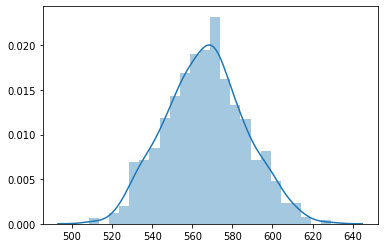

In [534]:
sat_read=[sum(np.random.choice(final['sat_evidence_read_write'], size=5,replace=False))/5 for _ in range(1000)]
sns.distplot(sat_read)

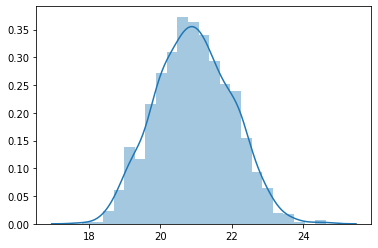

In [536]:
act_eng=[sum(np.random.choice(final['act_english'], size=5,replace=False))/5 for _ in range(1000)]
sns.distplot(act_eng)

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

All of the distributions samples adhere to the central limit theorem and thus it is safe to extract samples and make conclusions from the data.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

**H_0**: States with  high  ACT participation will have high SAT participation<br/>  **H_A**: States with high SAT participation will have low SAT participation



In [53]:
# Code:
import scipy.stats as stats

actpart=final['act_participation'].values.tolist()
satpart=final['sat_participation'].values.tolist()

stats.ttest_ind(actpart, satpart, equal_var=False)


Ttest_indResult(statistic=-4.25905915885418, pvalue=3.155970780387903e-05)

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Colorado is the state that increased to full participation. SAT became mandatory in 2017 in Colorado. <br/>
Georgia and Hawaii has high SAT participation rate and good scores even when ACT participation is high.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Observations** <br/>
ACT is more popular than SAT in US with more states making it mandatory. <br/>
When SAT participation is high (more than 70%) there will still be a significant number of ACT participation.<br/>
When ACT participation is high, SAT participation will be very low. <br/>
There are more states with high ACT participation (more than 50%) and do well in ACT (score above mean). There are no states with more than 50% SAT participation and do well (score above mean). If we compare to a lower score slightly below mean score, there are only 3 states with more than 50% SAT participation. Compared to 8 for ACT. 

**Recommendations** <br/>
SAT must work closely with a State's education board to encourage them to make SAT mandatory.<br/>
SAT may need to relook its rigour of its testing as no state with high participation actually score higher than the mean. 

**Other data** <br/>
The state's high school scores.
students' demographics.